Task 11

# Загрузка и первичный анализ данных

Датасет California Housing

Описание Датасета

Датасет California Housing является частью стандартных наборов данных в библиотеке scikit-learn.

Целью является предсказание средней стоимости домов (MedHouseVal) в этих районах на основе различных характеристик.

Структура Датасета

Датасет состоит из 20640 записей и 9 признаков. Вот подробное описание каждого признака:

MedInc: Средний доход населения района (в десятках тысяч долларов).

HouseAge: Средний возраст домов в районе.

AveRooms: Среднее количество комнат на дом в районе.

AveBedrms: Среднее количество спальних мест на дом в районе.

Population: Общая численность населения района.

AveOccup: Среднее количество людей на дом в районе.

Latitude: Широта района.

Longitude: Долгота района.

MedHouseVal: Средняя стоимость домов в районе (в сотнях тысяч долларов).

Целевая переменная в данном датасете — MedHouseVal, которая представляет собой
среднюю стоимость домов в каждом районе Калифорнии.

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Загружаем данные
california_housing = fetch_california_housing()

# Преобразуем данные в DataFrame
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['MedHouseVal'] = california_housing.target

# Выводим первые 5 строк данных
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Общая информация о данных
display(data.info())

print("-" * 50)

# Базовые статистические показатели
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


None

--------------------------------------------------


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
# Проверка на наличие пропущенных значений
display(data.isnull().sum())

print("-" * 50)

# Проверка на наличие дубликатов
data.duplicated().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


--------------------------------------------------


0

# Визуальный анализ данных

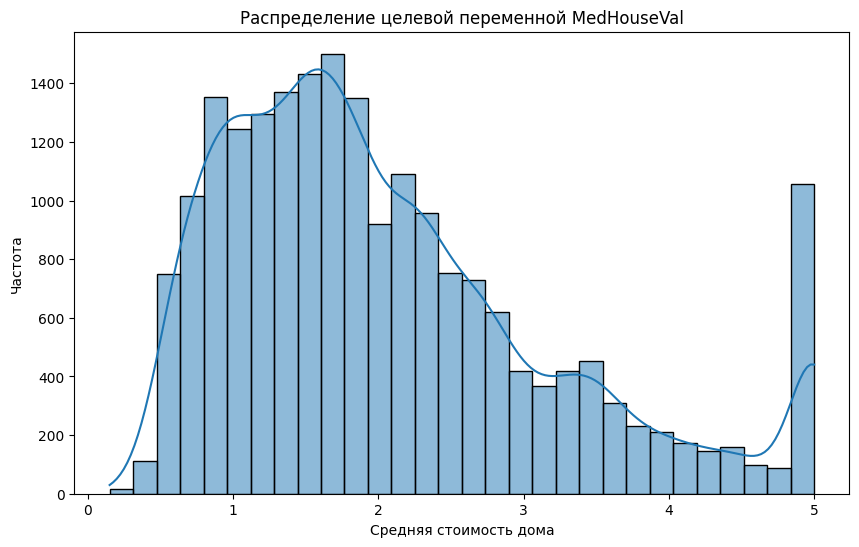

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Гистограмма распределения целевой переменной
plt.figure(figsize=(10, 6))
sns.histplot(data['MedHouseVal'], bins=30, kde=True)
plt.title('Распределение целевой переменной MedHouseVal')
plt.xlabel('Средняя стоимость дома')
plt.ylabel('Частота')
plt.show()

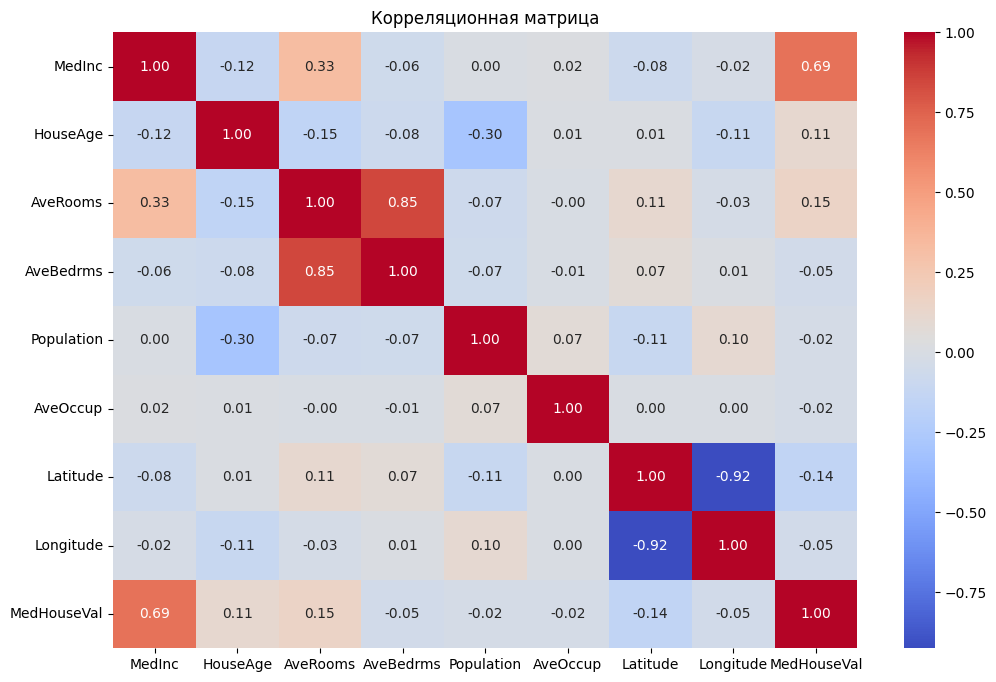

In [ ]:
# Корреляционная матрица
corr_matrix = data.corr()

# Тепловая карта корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

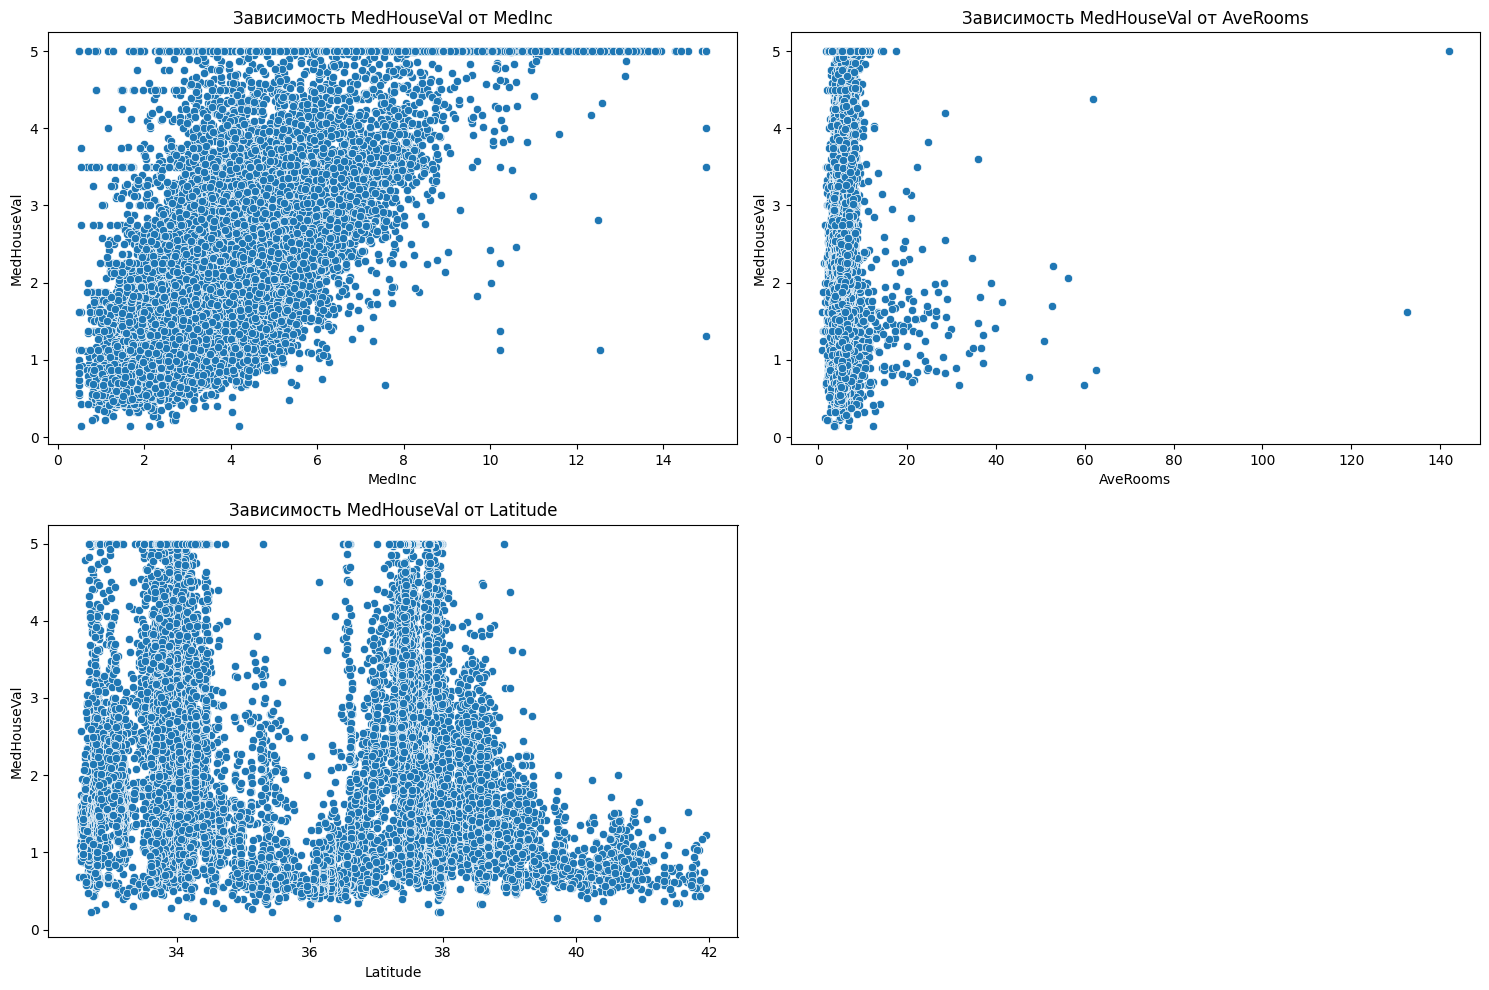

In [ ]:
# Выберем признаки с наибольшей корреляцией с целевой переменной
top_corr_features = corr_matrix['MedHouseVal'].abs().sort_values(ascending=False).index[1:4]

# Построим графики зависимости целевой переменной от выбранных признаков
plt.figure(figsize=(15, 10))

for i, feature in enumerate(top_corr_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=data[feature], y=data['MedHouseVal'])
    plt.title(f'Зависимость MedHouseVal от {feature}')
    plt.xlabel(feature)
    plt.ylabel('MedHouseVal')

plt.tight_layout()
plt.show()

# Преобразование Данных

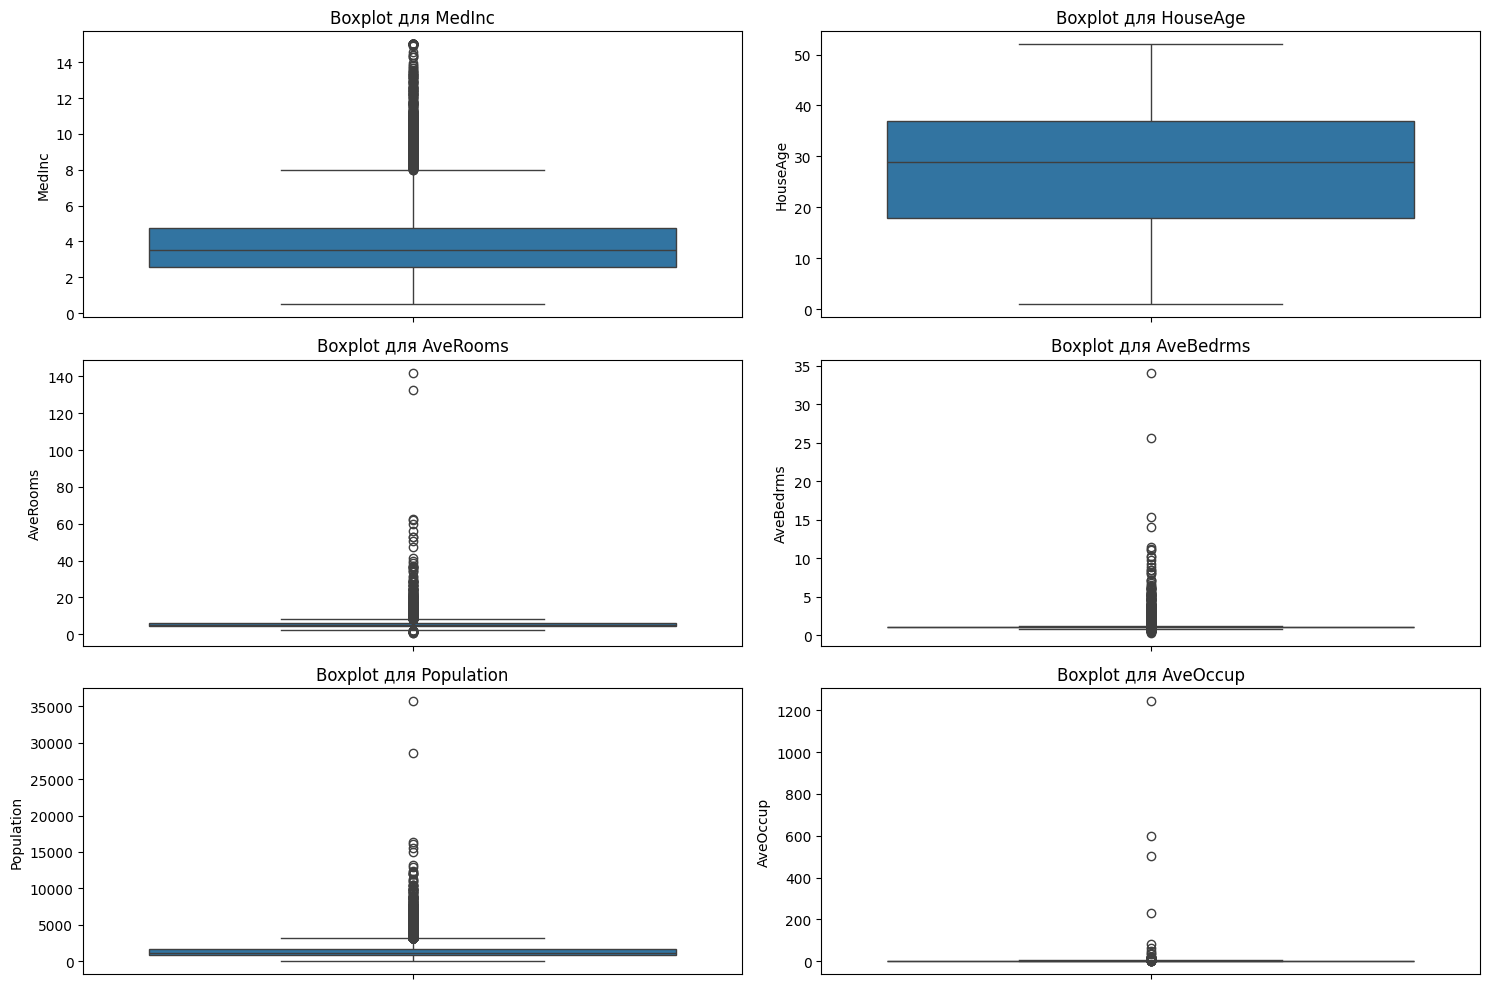

Размер данных до удаления выбросов: 20640
Размер данных после удаления выбросов: 16813


In [ ]:
import numpy as np

# Логарифмическое преобразование целевой переменной
data['MedHouseVal_log'] = np.log1p(data['MedHouseVal'])

# Построим boxplot для выявления выбросов
plt.figure(figsize=(15, 10))

for i, feature in enumerate(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup'], 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=data[feature])
    plt.title(f'Boxplot для {feature}')

plt.tight_layout()
plt.show()

# Удаление выбросов с помощью IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Применение функции к данным
data_cleaned = data.copy()
for feature in ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']:
    data_cleaned = remove_outliers_iqr(data_cleaned, feature)

# Проверка размера данных после удаления выбросов
print(f'Размер данных до удаления выбросов: {len(data)}')
print(f'Размер данных после удаления выбросов: {len(data_cleaned)}')

In [ ]:
# Исключение признаков Latitude и Longitude
data_cleaned = data_cleaned.drop(columns=['Latitude', 'Longitude'])

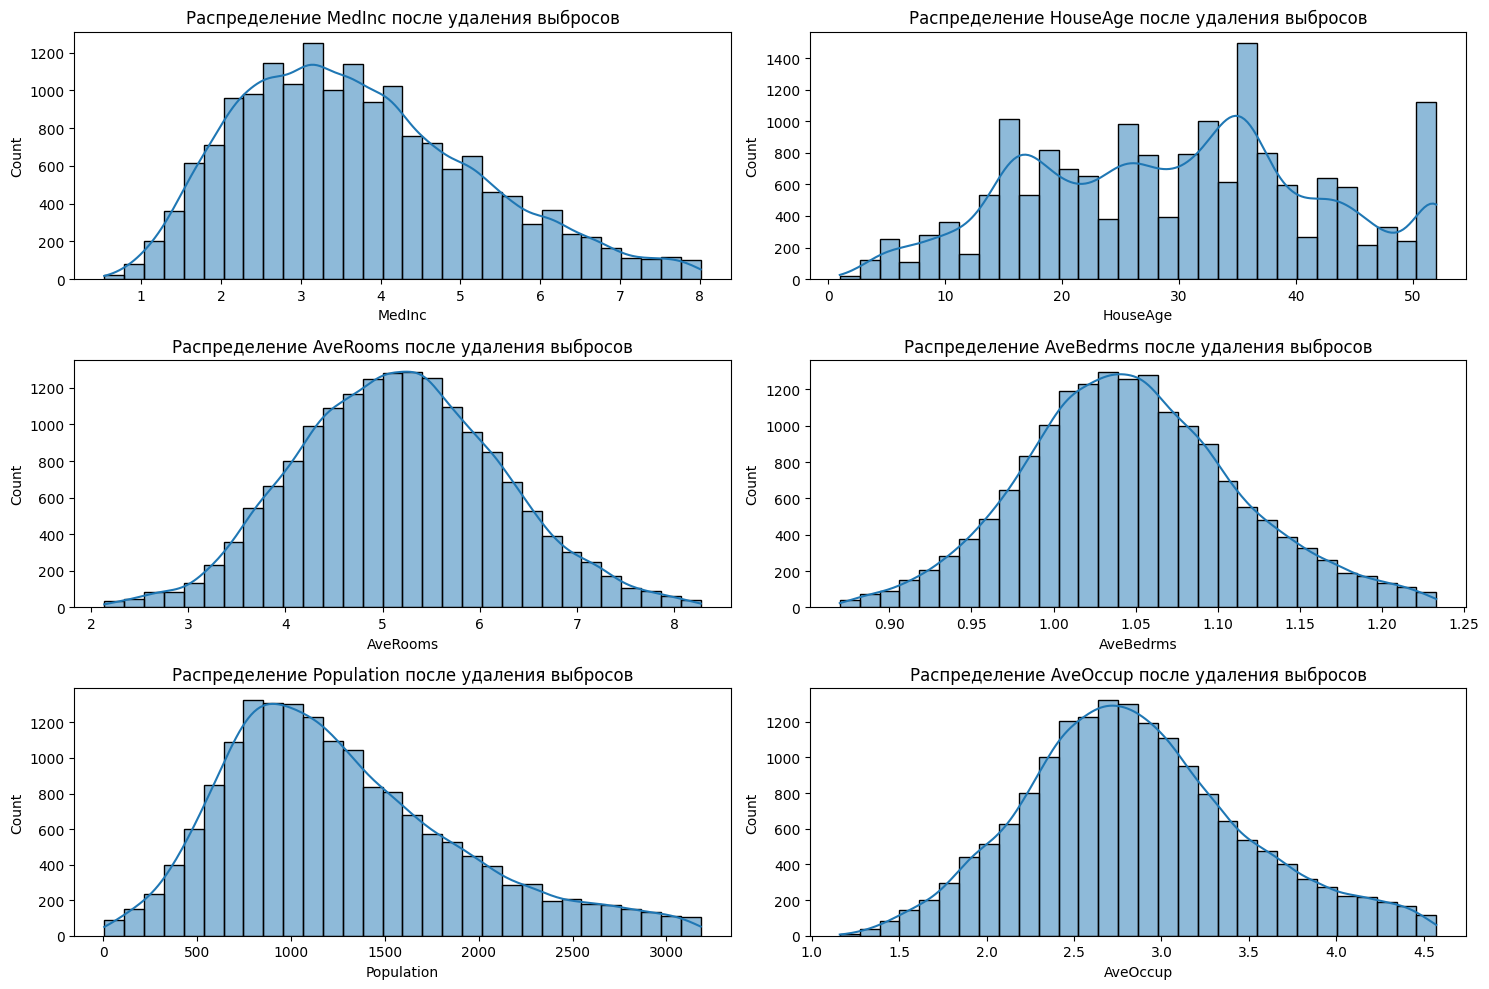

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построим распределение признаков после удаления выбросов
plt.figure(figsize=(15, 10))

for i, feature in enumerate(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup'], 1):
    plt.subplot(3, 2, i)
    sns.histplot(data_cleaned[feature], bins=30, kde=True)
    plt.title(f'Распределение {feature} после удаления выбросов')

plt.tight_layout()
plt.show()

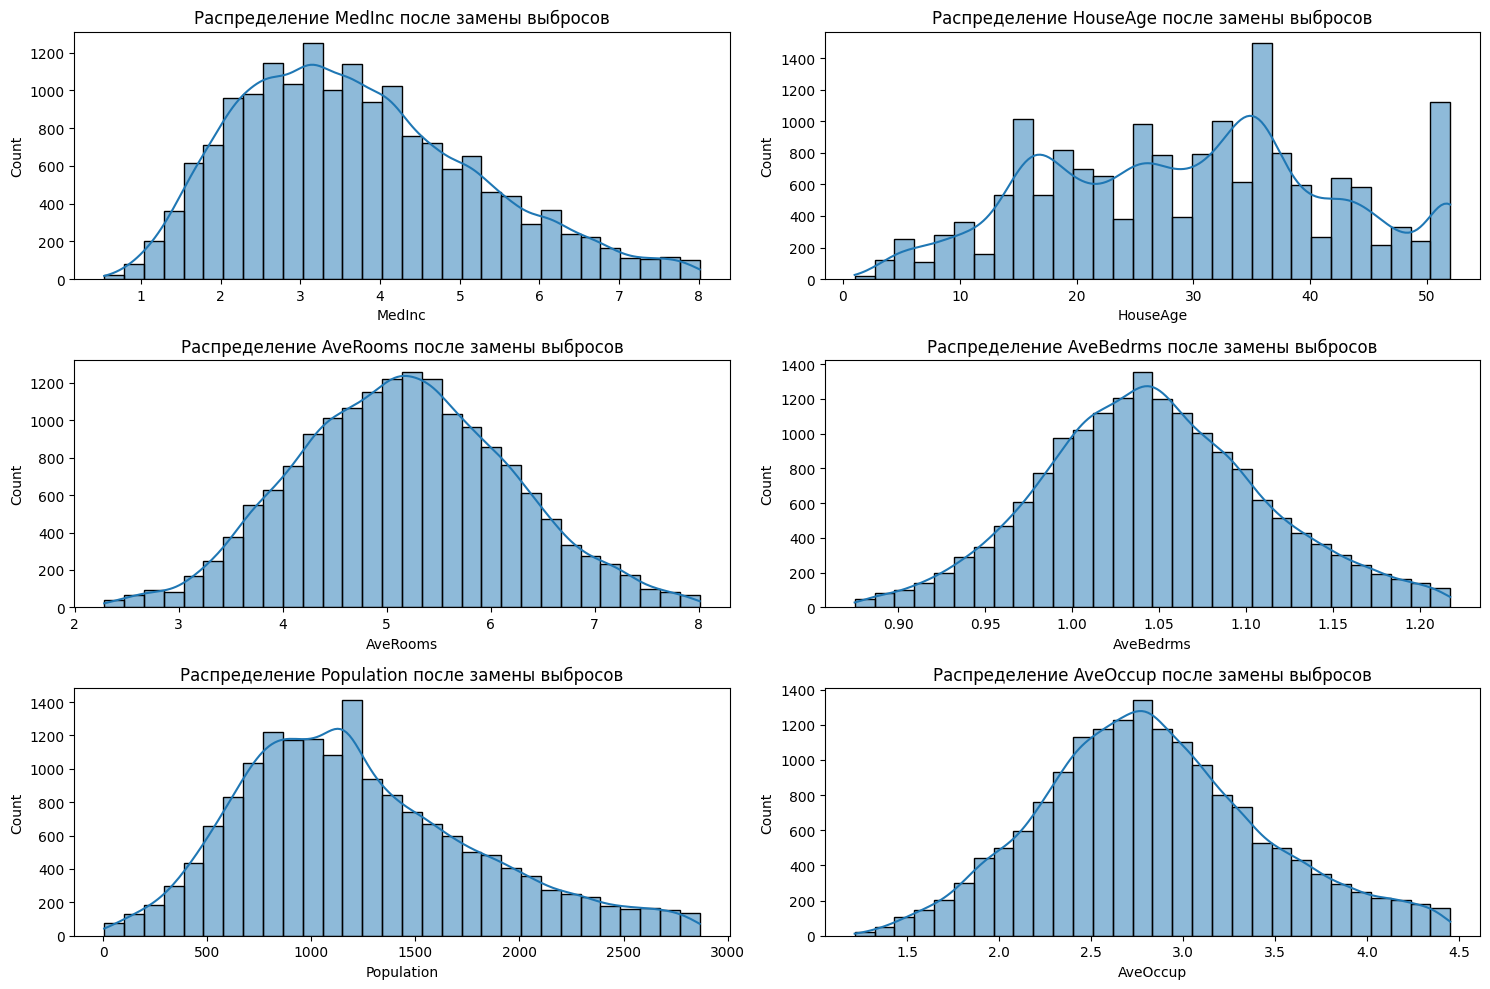

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Функция для замены выбросов на медиану
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[column].median()
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])
    return df

# Применение функции к данным
features_to_replace = ['AveRooms', 'AveBedrms', 'Population', 'AveOccup']
for feature in features_to_replace:
    data_cleaned = replace_outliers_with_median(data_cleaned, feature)

# Построим распределение признаков после замены выбросов
plt.figure(figsize=(15, 10))

for i, feature in enumerate(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup'], 1):
    plt.subplot(3, 2, i)
    sns.histplot(data_cleaned[feature], bins=30, kde=True)
    plt.title(f'Распределение {feature} после замены выбросов')

plt.tight_layout()
plt.show()

# Подготовка Данных для Обучения

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Разделение данных на признаки и целевую переменную
X = data_cleaned.drop(columns=['MedHouseVal', 'MedHouseVal_log'])
y = data_cleaned['MedHouseVal_log']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Проверка размеров выборок
print(f'Размер обучающей выборки: {X_train.shape}')
print(f'Размер тестовой выборки: {X_test.shape}')

Размер обучающей выборки: (13450, 6)
Размер тестовой выборки: (3363, 6)


# Обучение Моделей Регрессии

In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

# Настройка стиля визуализаций
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (15, 10)

In [ ]:
# Список моделей
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf')
}

# Словари для хранения результатов
training_times = {}
rmse_scores = {}
mae_scores = {}

# Обучение моделей и вычисление метрик
for model_name, model in models.items():
    start_time = time.time()

    # Обучение модели
    model.fit(X_train_scaled, y_train)

    # Вычисление времени обучения
    training_times[model_name] = time.time() - start_time

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test_scaled)

    # Вычисление метрик
    rmse_scores[model_name] = np.sqrt(mean_squared_error(y_test, y_pred))
    mae_scores[model_name] = mean_absolute_error(y_test, y_pred)

    print(f"{model_name}:")
    print(f"  Время обучения: {training_times[model_name]:.2f} секунд")
    print(f"  RMSE: {rmse_scores[model_name]:.4f}")
    print(f"  MAE: {mae_scores[model_name]:.4f}")
    print("-" * 50)

Linear Regression:
  Время обучения: 0.02 секунд
  RMSE: 0.2130
  MAE: 0.1638
--------------------------------------------------
Random Forest Regressor:
  Время обучения: 12.14 секунд
  RMSE: 0.1984
  MAE: 0.1505
--------------------------------------------------
Gradient Boosting Regressor:
  Время обучения: 3.51 секунд
  RMSE: 0.1981
  MAE: 0.1512
--------------------------------------------------
Support Vector Regressor:
  Время обучения: 8.92 секунд
  RMSE: 0.1943
  MAE: 0.1465
--------------------------------------------------


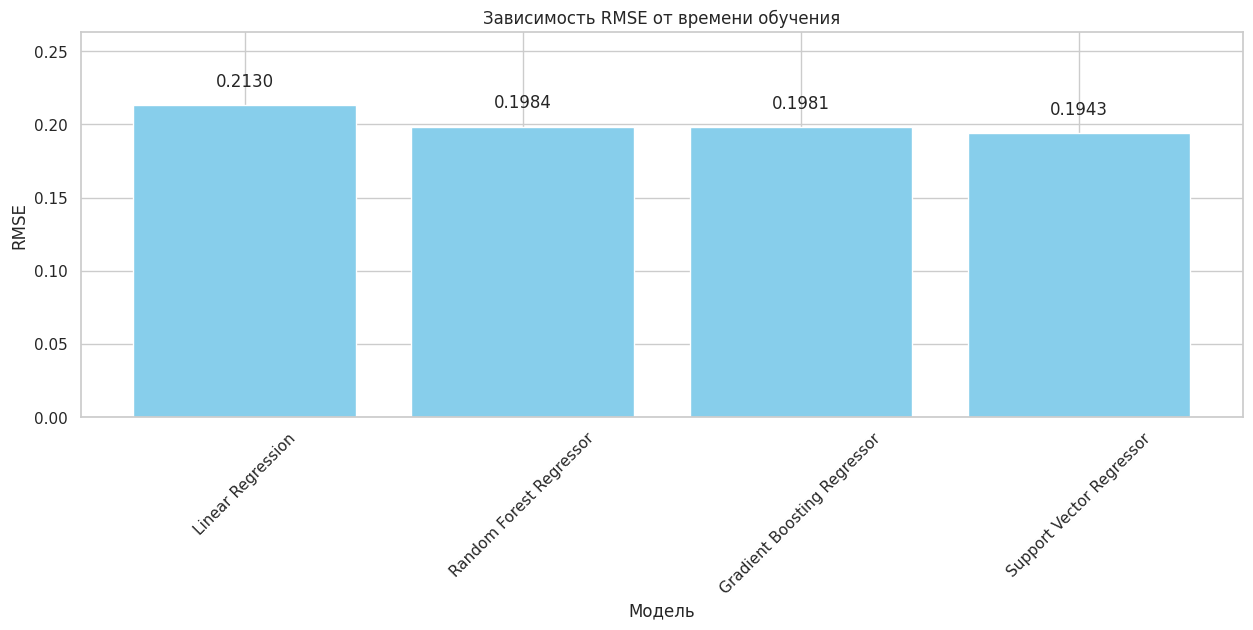

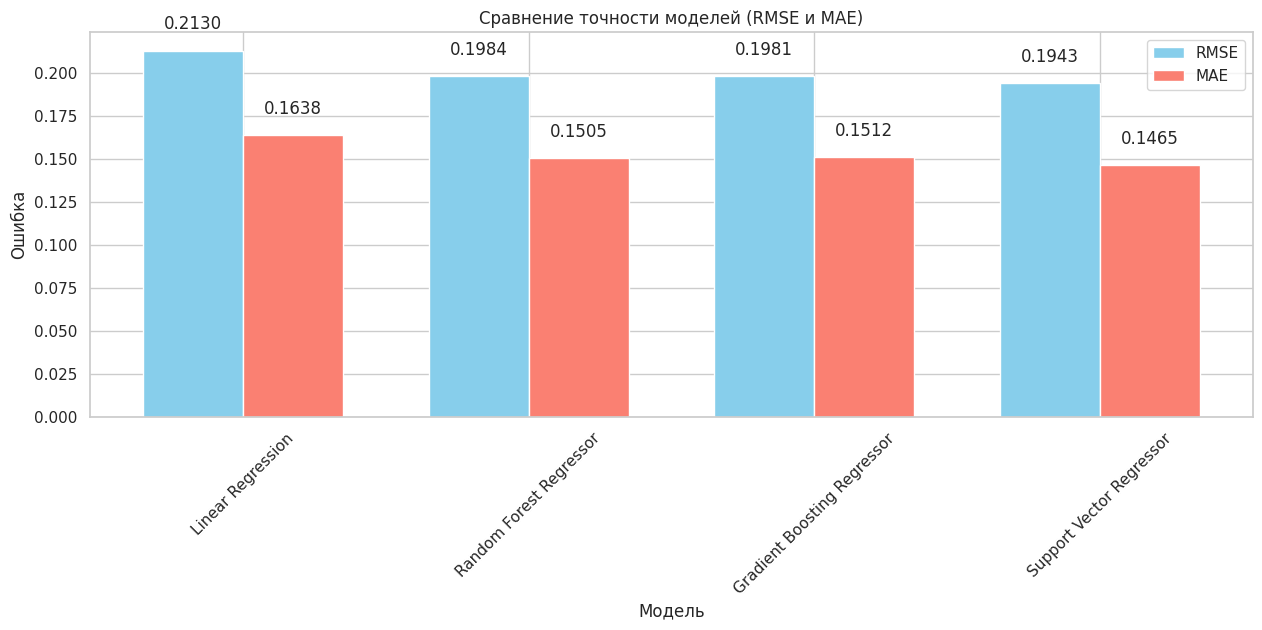

In [ ]:
# График зависимости RMSE от времени обучения
plt.figure(figsize=(15, 5))
plt.bar(training_times.keys(), rmse_scores.values(), color='skyblue')
plt.xlabel('Модель')
plt.ylabel('RMSE')
plt.title('Зависимость RMSE от времени обучения')
plt.ylim(0, max(rmse_scores.values()) + 0.05)
plt.xticks(rotation=45)
for i, v in enumerate(rmse_scores.values()):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom')
plt.show()

# График сравнения точности моделей (RMSE и MAE)
plt.figure(figsize=(15, 5))
bar_width = 0.35
index = np.arange(len(models))

plt.bar(index, rmse_scores.values(), bar_width, label='RMSE', color='skyblue')
plt.bar(index + bar_width, mae_scores.values(), bar_width, label='MAE', color='salmon')

plt.xlabel('Модель')
plt.ylabel('Ошибка')
plt.title('Сравнение точности моделей (RMSE и MAE)')
plt.xticks(index + bar_width / 2, models.keys(), rotation=45)
plt.legend()
for i, v in enumerate(rmse_scores.values()):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom')
for i, v in enumerate(mae_scores.values()):
    plt.text(i + bar_width, v + 0.01, f"{v:.4f}", ha='center', va='bottom')
plt.show()

# Подбор Гиперпараметров и Оценка Моделей

In [ ]:
from sklearn.model_selection import GridSearchCV

# Подбор гиперпараметров для Random Forest Regressor
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)
best_rf = grid_search_rf.best_estimator_

# Вывод лучших гиперпараметров для Random Forest Regressor
print("Лучшие гиперпараметры для Random Forest Regressor:")
print(grid_search_rf.best_params_)
print("-" * 50)

# Обучение модели с лучшими гиперпараметрами и вычисление метрик
start_time = time.time()
best_rf.fit(X_train_scaled, y_train)
training_times_best_rf = time.time() - start_time

y_pred_rf = best_rf.predict(X_test_scaled)
rmse_scores_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_scores_best_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest Regressor с лучшими гиперпараметрами:")
print(f"  Время обучения: {training_times_best_rf:.2f} секунд")
print(f"  RMSE: {rmse_scores_best_rf:.4f}")
print(f"  MAE: {mae_scores_best_rf:.4f}")
print("-" * 50)

Лучшие гиперпараметры для Random Forest Regressor:
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
--------------------------------------------------
Random Forest Regressor с лучшими гиперпараметрами:
  Время обучения: 14.92 секунд
  RMSE: 0.1974
  MAE: 0.1491
--------------------------------------------------


In [ ]:
# Подбор гиперпараметров для Gradient Boosting Regressor
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gb.fit(X_train_scaled, y_train)
best_gb = grid_search_gb.best_estimator_

# Вывод лучших гиперпараметров для Gradient Boosting Regressor
print("Лучшие гиперпараметры для Gradient Boosting Regressor:")
print(grid_search_gb.best_params_)
print("-" * 50)

# Обучение модели с лучшими гиперпараметрами и вычисление метрик
start_time = time.time()
best_gb.fit(X_train_scaled, y_train)
training_times_best_gb = time.time() - start_time

y_pred_gb = best_gb.predict(X_test_scaled)
rmse_scores_best_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae_scores_best_gb = mean_absolute_error(y_test, y_pred_gb)

print(f"Gradient Boosting Regressor с лучшими гиперпараметрами:")
print(f"  Время обучения: {training_times_best_gb:.2f} секунд")
print(f"  RMSE: {rmse_scores_best_gb:.4f}")
print(f"  MAE: {mae_scores_best_gb:.4f}")
print("-" * 50)

Лучшие гиперпараметры для Gradient Boosting Regressor:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
--------------------------------------------------
Gradient Boosting Regressor с лучшими гиперпараметрами:
  Время обучения: 6.88 секунд
  RMSE: 0.1961
  MAE: 0.1485
--------------------------------------------------


In [ ]:
# Подбор гиперпараметров для Support Vector Regressor
param_grid_svr = {
    'C': [1, 10, 100],
    'epsilon': [0.1, 0.2, 0.3]
}
grid_search_svr = GridSearchCV(SVR(kernel='rbf'), param_grid_svr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_svr.fit(X_train_scaled, y_train)
best_svr = grid_search_svr.best_estimator_

# Вывод лучших гиперпараметров для Support Vector Regressor
print("Лучшие гиперпараметры для Support Vector Regressor:")
print(grid_search_svr.best_params_)
print("-" * 50)

# Обучение модели с лучшими гиперпараметрами и вычисление метрик
start_time = time.time()
best_svr.fit(X_train_scaled, y_train)
training_times_best_svr = time.time() - start_time

y_pred_svr = best_svr.predict(X_test_scaled)
rmse_scores_best_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
mae_scores_best_svr = mean_absolute_error(y_test, y_pred_svr)

print(f"Support Vector Regressor с лучшими гиперпараметрами:")
print(f"  Время обучения: {training_times_best_svr:.2f} секунд")
print(f"  RMSE: {rmse_scores_best_svr:.4f}")
print(f"  MAE: {mae_scores_best_svr:.4f}")
print("-" * 50)

Лучшие гиперпараметры для Support Vector Regressor:
{'C': 1, 'epsilon': 0.1}
--------------------------------------------------
Support Vector Regressor с лучшими гиперпараметрами:
  Время обучения: 12.00 секунд
  RMSE: 0.1943
  MAE: 0.1465
--------------------------------------------------


In [ ]:
# Оценка Linear Regression с базовыми параметрами
lr = LinearRegression()
start_time = time.time()
lr.fit(X_train_scaled, y_train)
training_times_best_lr = time.time() - start_time

y_pred_lr = lr.predict(X_test_scaled)
rmse_scores_best_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_scores_best_lr = mean_absolute_error(y_test, y_pred_lr)

print(f"Linear Regression с базовыми параметрами:")
print(f"  Время обучения: {training_times_best_lr:.2f} секунд")
print(f"  RMSE: {rmse_scores_best_lr:.4f}")
print(f"  MAE: {mae_scores_best_lr:.4f}")
print("-" * 50)

Linear Regression с базовыми параметрами:
  Время обучения: 0.05 секунд
  RMSE: 0.2130
  MAE: 0.1638
--------------------------------------------------


In [ ]:
# Сбор результатов в словари
training_times_best = {
    "Linear Regression": training_times_best_lr,
    "Random Forest Regressor": training_times_best_rf,
    "Gradient Boosting Regressor": training_times_best_gb,
    "Support Vector Regressor": training_times_best_svr
}

rmse_scores_best = {
    "Linear Regression": rmse_scores_best_lr,
    "Random Forest Regressor": rmse_scores_best_rf,
    "Gradient Boosting Regressor": rmse_scores_best_gb,
    "Support Vector Regressor": rmse_scores_best_svr
}

mae_scores_best = {
    "Linear Regression": mae_scores_best_lr,
    "Random Forest Regressor": mae_scores_best_rf,
    "Gradient Boosting Regressor": mae_scores_best_gb,
    "Support Vector Regressor": mae_scores_best_svr
}

# Вывод результатов
print("Сравнение моделей с лучшими гиперпараметрами:")
print("Время обучения:")
display(training_times_best)
print("\nRMSE:")
display(rmse_scores_best)
print("\nMAE:")
display(mae_scores_best)

Сравнение моделей с лучшими гиперпараметрами:
Время обучения:


{'Linear Regression': 0.04601287841796875,
 'Random Forest Regressor': 14.921996831893921,
 'Gradient Boosting Regressor': 6.8817384243011475,
 'Support Vector Regressor': 12.002113342285156}


RMSE:


{'Linear Regression': 0.21301769226735764,
 'Random Forest Regressor': 0.1973747738780404,
 'Gradient Boosting Regressor': 0.19607965667296318,
 'Support Vector Regressor': 0.1943092420273246}


MAE:


{'Linear Regression': 0.16382696861954876,
 'Random Forest Regressor': 0.14910048911582477,
 'Gradient Boosting Regressor': 0.14853594964214809,
 'Support Vector Regressor': 0.14645164749904607}

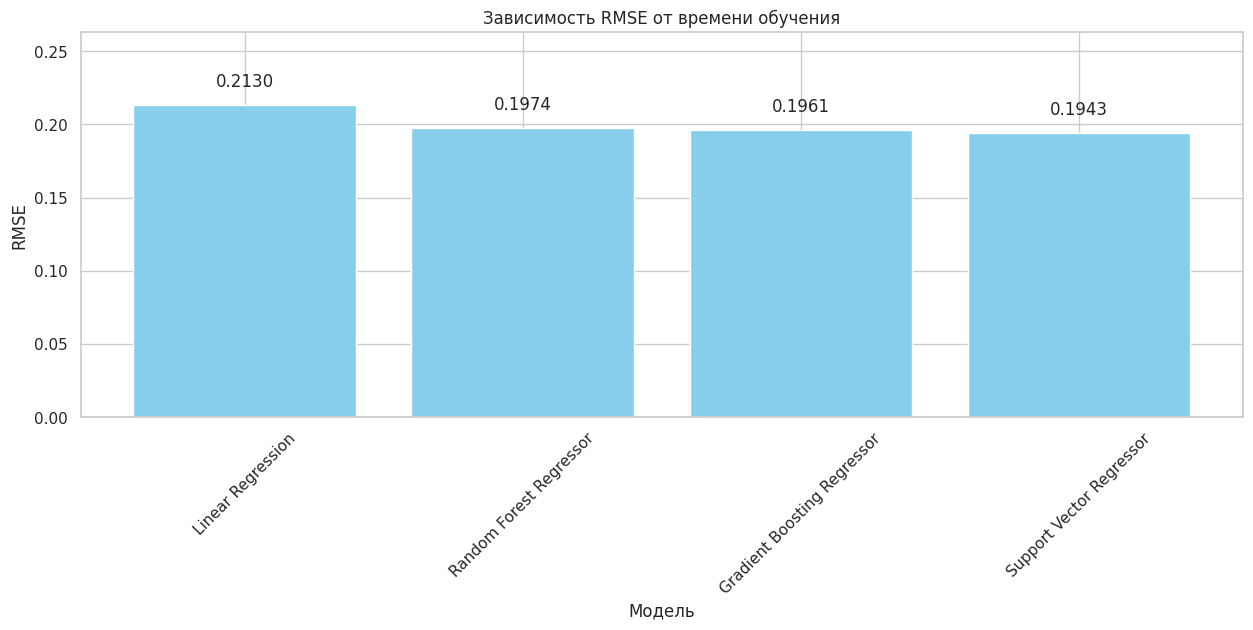

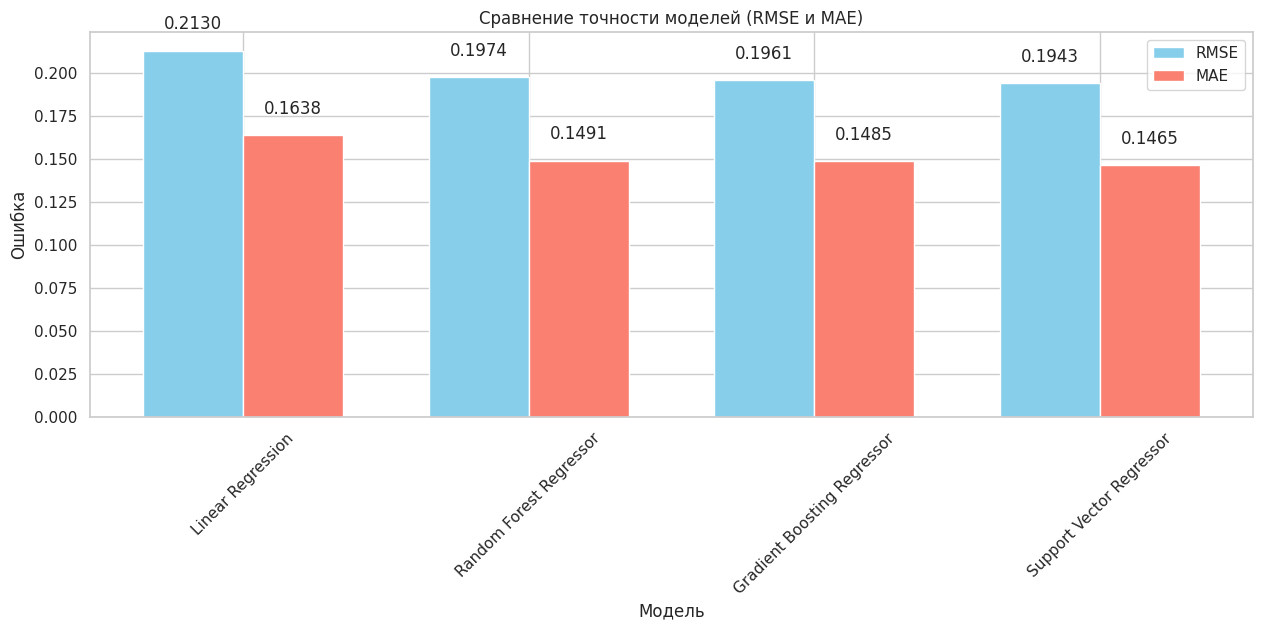

In [ ]:
# График зависимости RMSE от времени обучения
plt.figure(figsize=(15, 5))
plt.bar(training_times_best.keys(), rmse_scores_best.values(), color='skyblue')
plt.xlabel('Модель')
plt.ylabel('RMSE')
plt.title('Зависимость RMSE от времени обучения')
plt.ylim(0, max(rmse_scores_best.values()) + 0.05)
plt.xticks(rotation=45)
for i, v in enumerate(rmse_scores_best.values()):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom')
plt.show()

# График сравнения точности моделей (RMSE и MAE)
plt.figure(figsize=(15, 5))
bar_width = 0.35
index = np.arange(len(models))

plt.bar(index, rmse_scores_best.values(), bar_width, label='RMSE', color='skyblue')
plt.bar(index + bar_width, mae_scores_best.values(), bar_width, label='MAE', color='salmon')

plt.xlabel('Модель')
plt.ylabel('Ошибка')
plt.title('Сравнение точности моделей (RMSE и MAE)')
plt.xticks(index + bar_width / 2, models.keys(), rotation=45)
plt.legend()
for i, v in enumerate(rmse_scores_best.values()):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom')
for i, v in enumerate(mae_scores_best.values()):
    plt.text(i + bar_width, v + 0.01, f"{v:.4f}", ha='center', va='bottom')
plt.show()

# Реализация Простого Линейного Регрессора

In [ ]:
import numpy as np

class SimpleLinearRegressor:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Обучение простого линейного регрессора
simple_lr = SimpleLinearRegressor(learning_rate=0.01, n_iterations=1000)
start_time = time.time()
simple_lr.fit(X_train_scaled, y_train)
training_times_simple_lr = time.time() - start_time

y_pred_simple_lr = simple_lr.predict(X_test_scaled)
rmse_scores_simple_lr = np.sqrt(mean_squared_error(y_test, y_pred_simple_lr))
mae_scores_simple_lr = mean_absolute_error(y_test, y_pred_simple_lr)

print(f"Simple Linear Regressor:")
print(f"  Время обучения: {training_times_simple_lr:.2f} секунд")
print(f"  RMSE: {rmse_scores_simple_lr:.4f}")
print(f"  MAE: {mae_scores_simple_lr:.4f}")
print("-" * 50)

Simple Linear Regressor:
  Время обучения: 3.59 секунд
  RMSE: 0.2130
  MAE: 0.1644
--------------------------------------------------


In [ ]:
# Добавляем результаты простого линейного регрессора в словари
training_times_all = {
    "Linear Regression": training_times_best_lr,
    "Random Forest Regressor": training_times_best_rf,
    "Gradient Boosting Regressor": training_times_best_gb,
    "Support Vector Regressor": training_times_best_svr,
    "Simple Linear Regressor": training_times_simple_lr
}

rmse_scores_all = {
    "Linear Regression": rmse_scores_best_lr,
    "Random Forest Regressor": rmse_scores_best_rf,
    "Gradient Boosting Regressor": rmse_scores_best_gb,
    "Support Vector Regressor": rmse_scores_best_svr,
    "Simple Linear Regressor": rmse_scores_simple_lr
}

mae_scores_all = {
    "Linear Regression": mae_scores_best_lr,
    "Random Forest Regressor": mae_scores_best_rf,
    "Gradient Boosting Regressor": mae_scores_best_gb,
    "Support Vector Regressor": mae_scores_best_svr,
    "Simple Linear Regressor": mae_scores_simple_lr
}

Сравнение всех моделей:
Время обучения:


{'Linear Regression': 0.04601287841796875,
 'Random Forest Regressor': 14.921996831893921,
 'Gradient Boosting Regressor': 6.8817384243011475,
 'Support Vector Regressor': 12.002113342285156,
 'Simple Linear Regressor': 3.594041585922241}


RMSE:


{'Linear Regression': 0.21301769226735764,
 'Random Forest Regressor': 0.1973747738780404,
 'Gradient Boosting Regressor': 0.19607965667296318,
 'Support Vector Regressor': 0.1943092420273246,
 'Simple Linear Regressor': 0.2130369997050531}


MAE:


{'Linear Regression': 0.16382696861954876,
 'Random Forest Regressor': 0.14910048911582477,
 'Gradient Boosting Regressor': 0.14853594964214809,
 'Support Vector Regressor': 0.14645164749904607,
 'Simple Linear Regressor': 0.16437138590080663}

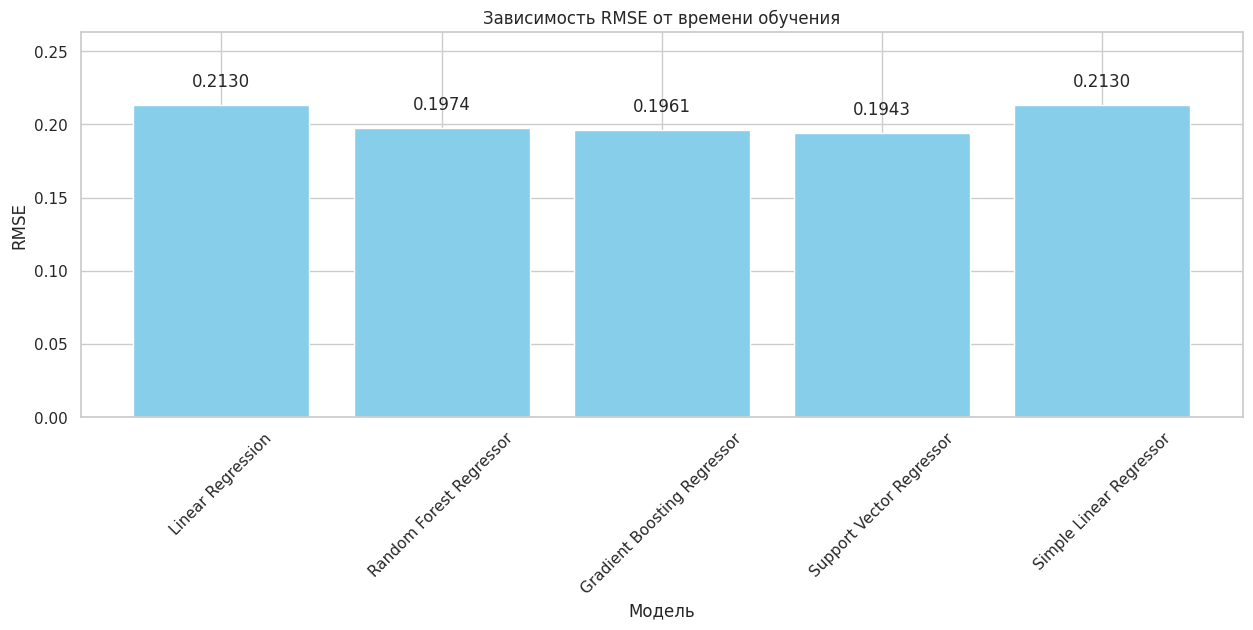

In [ ]:
# График зависимости RMSE от времени обучения
plt.figure(figsize=(15, 5))
plt.bar(training_times_all.keys(), rmse_scores_all.values(), color='skyblue')
plt.xlabel('Модель')
plt.ylabel('RMSE')
plt.title('Зависимость RMSE от времени обучения')
plt.ylim(0, max(rmse_scores_all.values()) + 0.05)
plt.xticks(rotation=45)
for i, v in enumerate(rmse_scores_all.values()):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom')
plt.show()

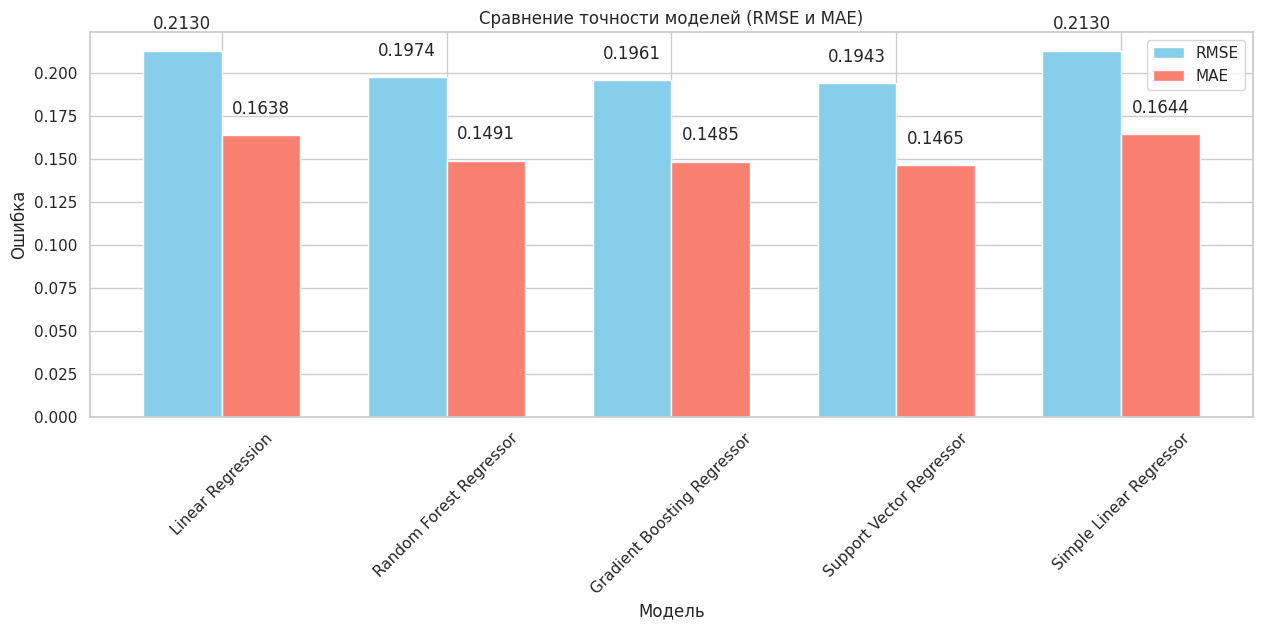

In [ ]:
# График сравнения точности моделей (RMSE и MAE)
plt.figure(figsize=(15, 5))
bar_width = 0.35
index = np.arange(len(training_times_all))

plt.bar(index, rmse_scores_all.values(), bar_width, label='RMSE', color='skyblue')
plt.bar(index + bar_width, mae_scores_all.values(), bar_width, label='MAE', color='salmon')

plt.xlabel('Модель')
plt.ylabel('Ошибка')
plt.title('Сравнение точности моделей (RMSE и MAE)')
plt.xticks(index + bar_width / 2, training_times_all.keys(), rotation=45)
plt.legend()
for i, v in enumerate(rmse_scores_all.values()):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom')
for i, v in enumerate(mae_scores_all.values()):
    plt.text(i + bar_width, v + 0.01, f"{v:.4f}", ha='center', va='bottom')
plt.show()

# Автоматическое Машинное Обучение с H2O AutoML

In [ ]:
!pip install h2o

  Using cached h2o-3.46.0.6-py2.py3-none-any.whl


In [ ]:
from h2o.automl import H2OAutoML
import h2o

# Инициализация H2O
h2o.init()

# Преобразование данных в формат H2O
train_h2o = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
test_h2o = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))

# Указываем целевую переменную
target = 'MedHouseVal_log'

# Запуск AutoML
aml = H2OAutoML(max_runtime_secs=300, seed=42)
aml.train(x=train_h2o.columns[:-1], y=target, training_frame=train_h2o)

# Получение лучшей модели
best_model_aml = aml.get_best_model()

# Предсказание на тестовой выборке
preds_aml = best_model_aml.predict(test_h2o.drop(target))
y_pred_aml = preds_aml.as_data_frame()['predict'].values

# Вычисление метрик
rmse_scores_aml = np.sqrt(mean_squared_error(y_test, y_pred_aml))
mae_scores_aml = mean_absolute_error(y_test, y_pred_aml)

print(f"H2O AutoML:")
print(f"  RMSE: {rmse_scores_aml:.4f}")
print(f"  MAE: {mae_scores_aml:.4f}")
print("-" * 50)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.25" 2024-10-15; OpenJDK Runtime Environment (build 11.0.25+9-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.25+9-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpbatdgffd
  JVM stdout: /tmp/tmpbatdgffd/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpbatdgffd/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,10 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,1 month and 17 days
H2O_cluster_name:,H2O_from_python_unknownUser_7ejpnc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
H2O AutoML:
  RMSE: 0.1944
  MAE: 0.1472
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
# Добавляем результаты H2O AutoML в словари
training_times_all['H2O AutoML'] = None  # Время обучения AutoML не доступно напрямую
rmse_scores_all['H2O AutoML'] = rmse_scores_aml
mae_scores_all['H2O AutoML'] = mae_scores_aml

# Вывод результатов
print("Сравнение всех моделей:")
print("Время обучения:")
display(training_times_all)
print("\nRMSE:")
display(rmse_scores_all)
print("\nMAE:")
display(mae_scores_all)

Сравнение всех моделей:
Время обучения:


{'Linear Regression': 0.04601287841796875,
 'Random Forest Regressor': 14.921996831893921,
 'Gradient Boosting Regressor': 6.8817384243011475,
 'Support Vector Regressor': 12.002113342285156,
 'Simple Linear Regressor': 3.594041585922241,
 'H2O AutoML': None}


RMSE:


{'Linear Regression': 0.21301769226735764,
 'Random Forest Regressor': 0.1973747738780404,
 'Gradient Boosting Regressor': 0.19607965667296318,
 'Support Vector Regressor': 0.1943092420273246,
 'Simple Linear Regressor': 0.2130369997050531,
 'H2O AutoML': 0.19438193393177494}


MAE:


{'Linear Regression': 0.16382696861954876,
 'Random Forest Regressor': 0.14910048911582477,
 'Gradient Boosting Regressor': 0.14853594964214809,
 'Support Vector Regressor': 0.14645164749904607,
 'Simple Linear Regressor': 0.16437138590080663,
 'H2O AutoML': 0.14719078366752472}

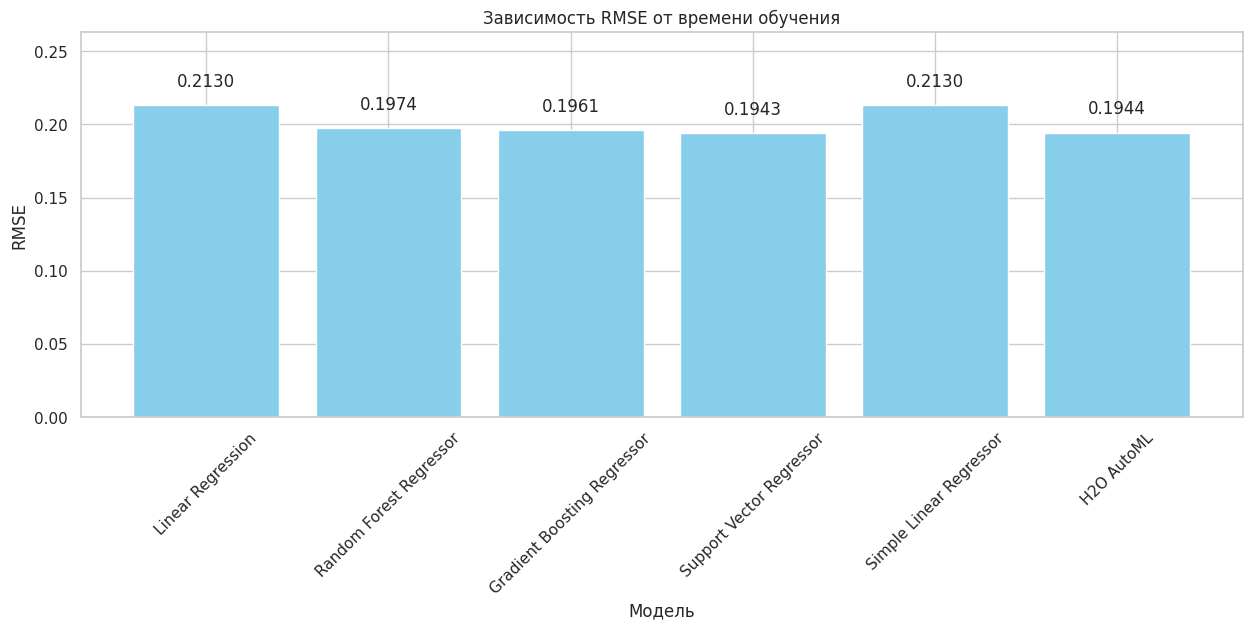

In [ ]:
# График зависимости RMSE от времени обучения
plt.figure(figsize=(15, 5))
plt.bar(training_times_all.keys(), rmse_scores_all.values(), color='skyblue')
plt.xlabel('Модель')
plt.ylabel('RMSE')
plt.title('Зависимость RMSE от времени обучения')
plt.ylim(0, max(rmse_scores_all.values()) + 0.05)
plt.xticks(rotation=45)
for i, v in enumerate(rmse_scores_all.values()):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom')
plt.show()

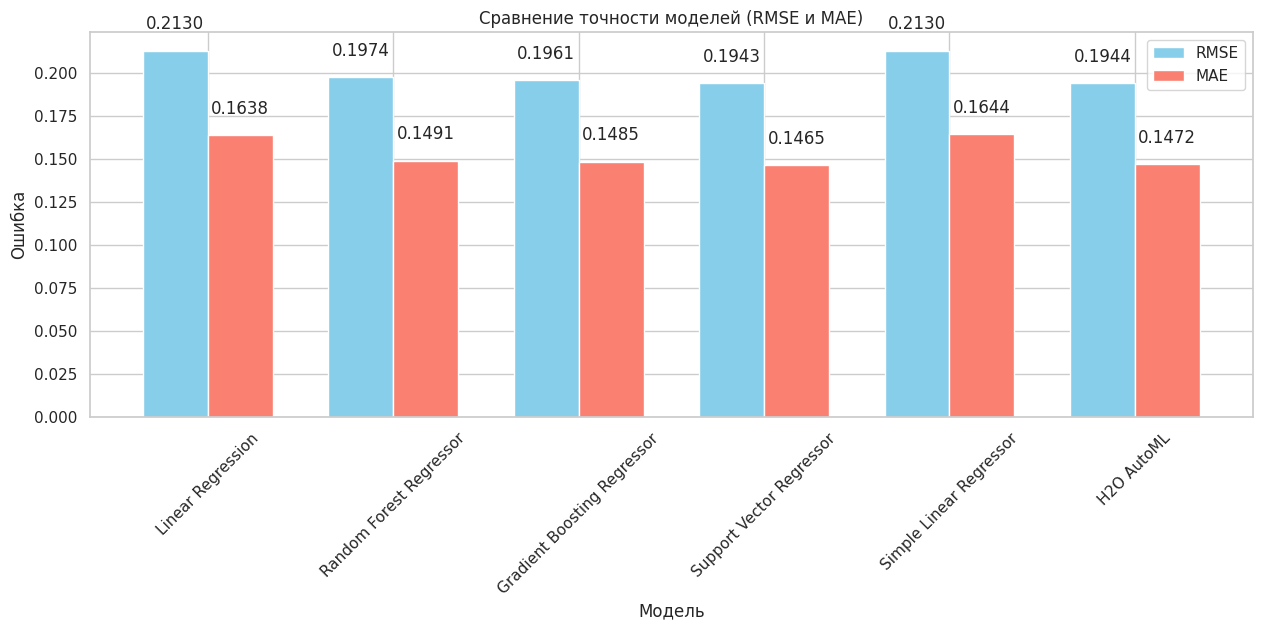

In [ ]:
# График сравнения точности моделей (RMSE и MAE)
plt.figure(figsize=(15, 5))
bar_width = 0.35
index = np.arange(len(training_times_all))

plt.bar(index, rmse_scores_all.values(), bar_width, label='RMSE', color='skyblue')
plt.bar(index + bar_width, mae_scores_all.values(), bar_width, label='MAE', color='salmon')

plt.xlabel('Модель')
plt.ylabel('Ошибка')
plt.title('Сравнение точности моделей (RMSE и MAE)')
plt.xticks(index + bar_width / 2, training_times_all.keys(), rotation=45)
plt.legend()
for i, v in enumerate(rmse_scores_all.values()):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom')
for i, v in enumerate(mae_scores_all.values()):
    plt.text(i + bar_width, v + 0.01, f"{v:.4f}", ha='center', va='bottom')
plt.show()

# Автоматическое Машинное Обучение с TPOT

In [ ]:
pip install tpot

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 6.8 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=7d422d728bbfd2c150a5f57615f74863c763596a0c3ef1a14cd6b7390def13ee
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
from tpot import TPOTRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Инициализация TPOTRegressor
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42, scoring='neg_mean_squared_error', cv=5)

# Обучение модели
start_time = time.time()
tpot.fit(X_train_scaled, y_train)
training_times_tp = time.time() - start_time

# Предсказание на тестовой выборке
y_pred_tp = tpot.predict(X_test_scaled)

# Вычисление метрик
rmse_scores_tp = np.sqrt(mean_squared_error(y_test, y_pred_tp))
mae_scores_tp = mean_absolute_error(y_test, y_pred_tp)

print(f"TPOT Regressor:")
print(f"  Время обучения: {training_times_tp:.2f} секунд")
print(f"  RMSE: {rmse_scores_tp:.4f}")
print(f"  MAE: {mae_scores_tp:.4f}")
print("-" * 50)

# Добавляем результаты TPOT в словари
training_times_all['TPOT Regressor'] = training_times_tp
rmse_scores_all['TPOT Regressor'] = rmse_scores_tp
mae_scores_all['TPOT Regressor'] = mae_scores_tp

# Вывод результатов
print("Сравнение всех моделей:")
print("Время обучения:")
display(training_times_all)
print("\nRMSE:")
display(rmse_scores_all)
print("\nMAE:")
display(mae_scores_all)

is_classifier
is_regressor
is_classifier
is_regressor
is_classifier


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.03915577518695343

Generation 2 - Current best internal CV score: -0.03915577518695343

Generation 3 - Current best internal CV score: -0.03915577518695343

Generation 4 - Current best internal CV score: -0.039116154661452365

Generation 5 - Current best internal CV score: -0.0389350445836417

Best pipeline: RandomForestRegressor(RidgeCV(input_matrix), bootstrap=True, max_features=0.35000000000000003, min_samples_leaf=11, min_samples_split=9, n_estimators=100)
TPOT Regressor:
  Время обучения: 2542.58 секунд
  RMSE: 0.1942
  MAE: 0.1475
--------------------------------------------------
Сравнение всех моделей:
Время обучения:


{'Linear Regression': 0.04601287841796875,
 'Random Forest Regressor': 14.921996831893921,
 'Gradient Boosting Regressor': 6.8817384243011475,
 'Support Vector Regressor': 12.002113342285156,
 'Simple Linear Regressor': 3.594041585922241,
 'H2O AutoML': None,
 'TPOT Regressor': 2542.584580898285}


RMSE:


{'Linear Regression': 0.21301769226735764,
 'Random Forest Regressor': 0.1973747738780404,
 'Gradient Boosting Regressor': 0.19607965667296318,
 'Support Vector Regressor': 0.1943092420273246,
 'Simple Linear Regressor': 0.2130369997050531,
 'H2O AutoML': 0.19438193393177494,
 'TPOT Regressor': 0.19420958624741863}


MAE:


{'Linear Regression': 0.16382696861954876,
 'Random Forest Regressor': 0.14910048911582477,
 'Gradient Boosting Regressor': 0.14853594964214809,
 'Support Vector Regressor': 0.14645164749904607,
 'Simple Linear Regressor': 0.16437138590080663,
 'H2O AutoML': 0.14719078366752472,
 'TPOT Regressor': 0.14753743780180592}

# Финальные Выводы

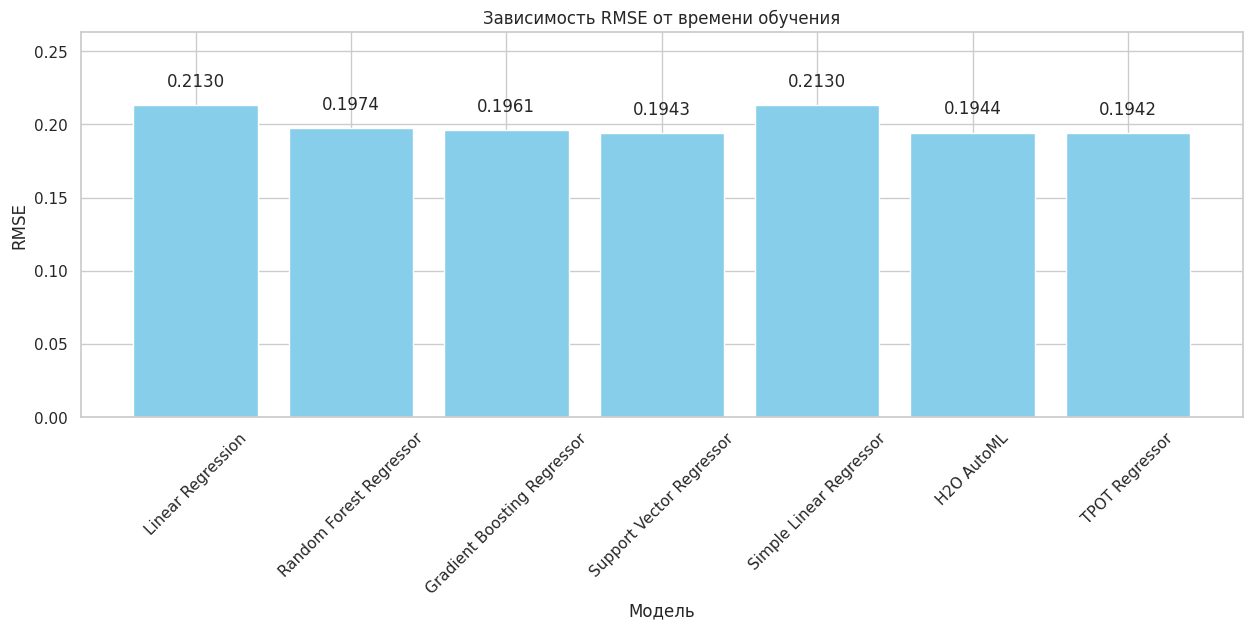

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

# График зависимости RMSE от времени обучения
plt.figure(figsize=(15, 5))
plt.bar(training_times_all.keys(), rmse_scores_all.values(), color='skyblue')
plt.xlabel('Модель')
plt.ylabel('RMSE')
plt.title('Зависимость RMSE от времени обучения')
plt.ylim(0, max(rmse_scores_all.values()) + 0.05)
plt.xticks(rotation=45)
for i, v in enumerate(rmse_scores_all.values()):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom')
plt.show()


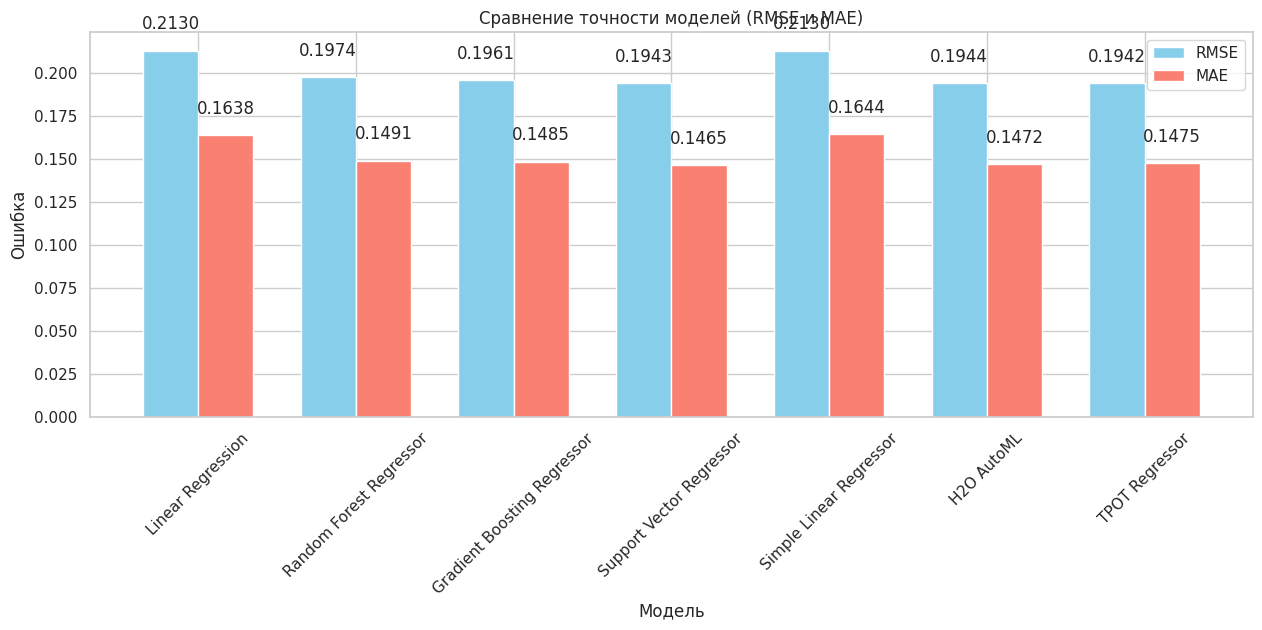

Финальные выводы:
Время обучения:


{'Linear Regression': 0.04601287841796875,
 'Random Forest Regressor': 14.921996831893921,
 'Gradient Boosting Regressor': 6.8817384243011475,
 'Support Vector Regressor': 12.002113342285156,
 'Simple Linear Regressor': 3.594041585922241,
 'H2O AutoML': None,
 'TPOT Regressor': 2542.584580898285}


RMSE:


{'Linear Regression': 0.21301769226735764,
 'Random Forest Regressor': 0.1973747738780404,
 'Gradient Boosting Regressor': 0.19607965667296318,
 'Support Vector Regressor': 0.1943092420273246,
 'Simple Linear Regressor': 0.2130369997050531,
 'H2O AutoML': 0.19438193393177494,
 'TPOT Regressor': 0.19420958624741863}


MAE:


{'Linear Regression': 0.16382696861954876,
 'Random Forest Regressor': 0.14910048911582477,
 'Gradient Boosting Regressor': 0.14853594964214809,
 'Support Vector Regressor': 0.14645164749904607,
 'Simple Linear Regressor': 0.16437138590080663,
 'H2O AutoML': 0.14719078366752472,
 'TPOT Regressor': 0.14753743780180592}

In [ ]:
# График сравнения точности моделей (RMSE и MAE)
plt.figure(figsize=(15, 5))
bar_width = 0.35
index = np.arange(len(training_times_all))

plt.bar(index, rmse_scores_all.values(), bar_width, label='RMSE', color='skyblue')
plt.bar(index + bar_width, mae_scores_all.values(), bar_width, label='MAE', color='salmon')

plt.xlabel('Модель')
plt.ylabel('Ошибка')
plt.title('Сравнение точности моделей (RMSE и MAE)')
plt.xticks(index + bar_width / 2, training_times_all.keys(), rotation=45)
plt.legend()
for i, v in enumerate(rmse_scores_all.values()):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom')
for i, v in enumerate(mae_scores_all.values()):
    plt.text(i + bar_width, v + 0.01, f"{v:.4f}", ha='center', va='bottom')
plt.show()

# Финальные выводы
print("Финальные выводы:")
print("Время обучения:")
display(training_times_all)
print("\nRMSE:")
display(rmse_scores_all)
print("\nMAE:")
display(mae_scores_all)